# Import Libraries

In [1]:
# Import the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import numpy as np
pd.set_option('display.max_colwidth', None)

# Load Dataset 

In [2]:
# Load Dataset
df = pd.read_csv('DataSet_PCP_Change.csv')

In [3]:
df

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
0,0,0,0.071912,0,NaN,2.0,0,0,0,0,0,1,0,0
1,2,0,0.448447,0,NaN,1.0,0,0,1,1,1,0,0,0
2,5,0,0.345793,0,NaN,1.0,0,1,0,0,0,1,0,0
3,6,0,1.857032,0,NaN,1.0,0,0,1,1,1,1,0,0
4,7,1,7.222060,0,NaN,1.0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,4994,0,1.447149,0,NaN,3.0,0,1,0,0,0,1,0,1
3126,4997,0,4.764236,12,51.0,1.0,0,1,0,1,1,1,0,0
3127,4998,0,2.796333,15,121.0,1.0,0,0,0,0,0,1,0,0
3128,4999,0,0.641309,0,NaN,1.0,1,0,1,1,1,0,0,0


# Analyze Dataset

In [4]:
# Check new dataset shape
df.shape

(3130, 14)

In [5]:
# Statistical description of numerical variables
df.describe()

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
count,3130.000000,3130.000000,3130.000000,3130.000000,556.000000,3121.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000
mean,2519.981789,0.040575,2.851791,1.074121,135.330935,1.814803,0.192332,0.442173,0.341853,0.376997,0.392332,0.511821,0.064856,0.065495
std,1439.130702,0.197335,5.797008,3.160802,121.441560,0.991786,0.394196,0.496724,0.474406,0.484712,0.488348,0.499940,0.246311,0.247437
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1271.250000,0.000000,0.466053,0.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2520.500000,0.000000,1.015903,0.000000,100.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3769.750000,0.000000,2.195092,0.000000,185.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,5000.000000,1.000000,50.000000,36.000000,736.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# View columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   testindex          3130 non-null   int64  
 1   outcome            3130 non-null   int64  
 2   distance           3130 non-null   float64
 3   visit_count        3130 non-null   int64  
 4   claims_daysaway    556 non-null    float64
 5   tier               3121 non-null   float64
 6   fqhc               3130 non-null   int64  
 7   pcp_lookback       3130 non-null   int64  
 8   family_assignment  3130 non-null   int64  
 9   kid                3130 non-null   int64  
 10  is_ped             3130 non-null   int64  
 11  same_gender        3130 non-null   int64  
 12  same_language      3130 non-null   int64  
 13  same_address       3130 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 342.5 KB


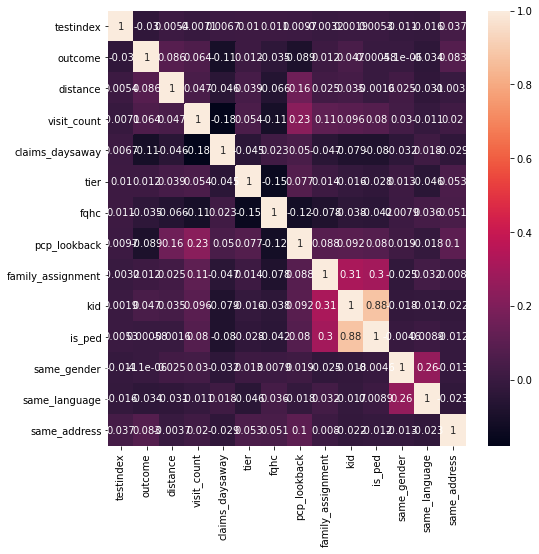

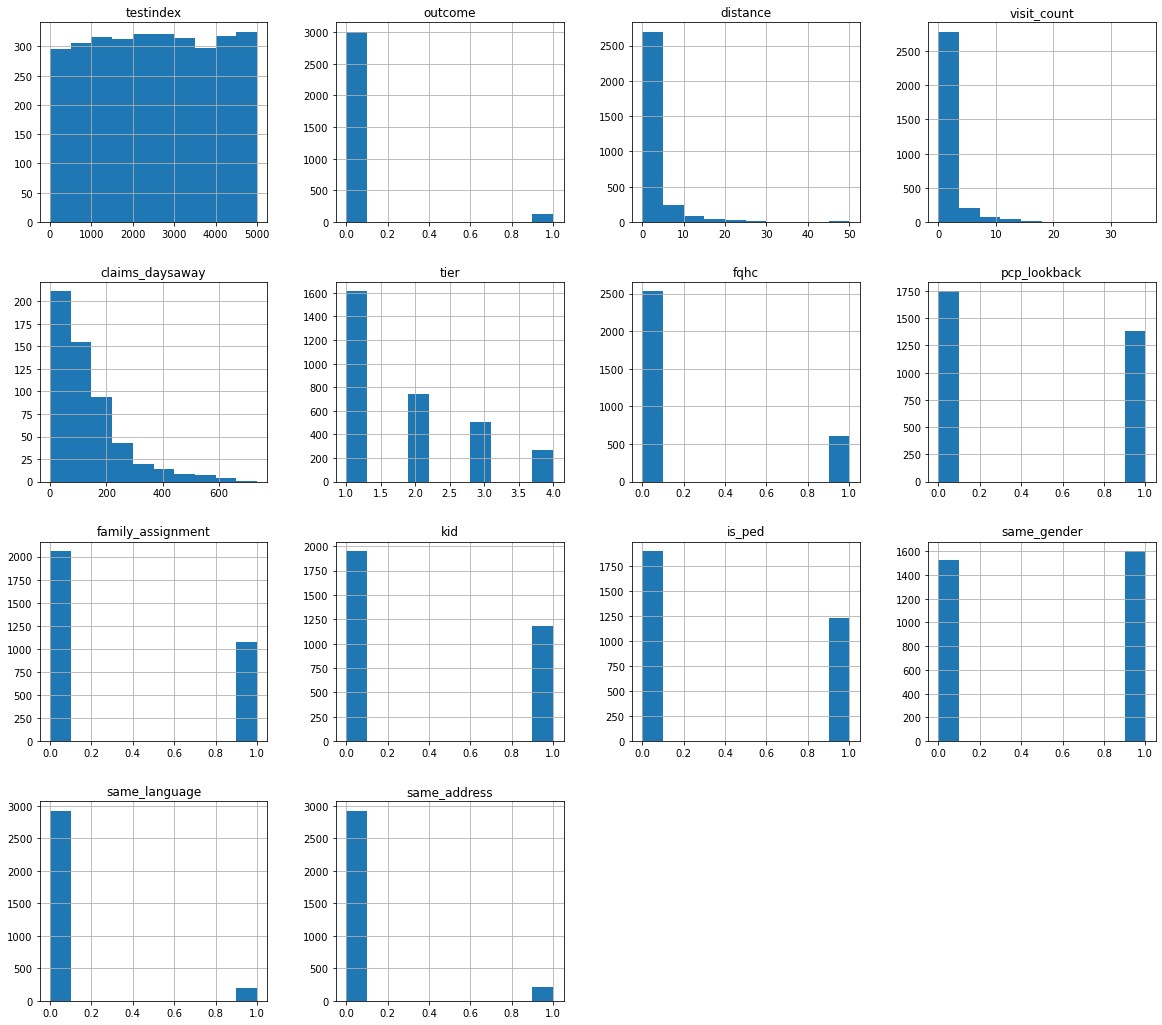

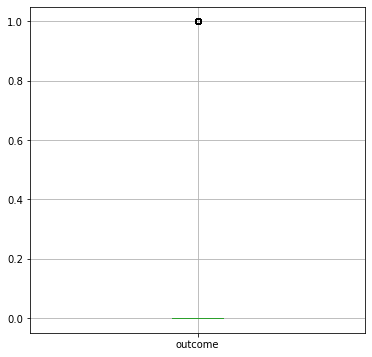

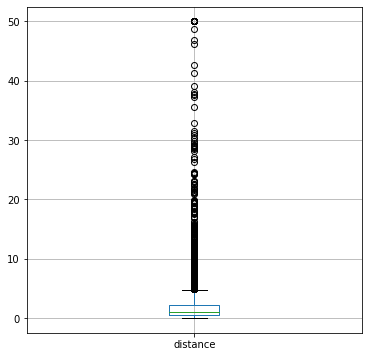

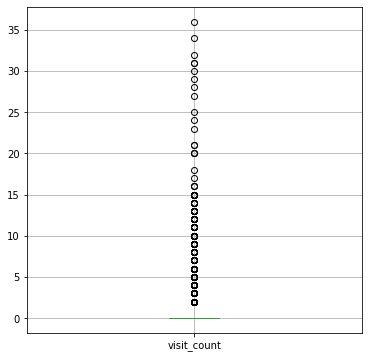

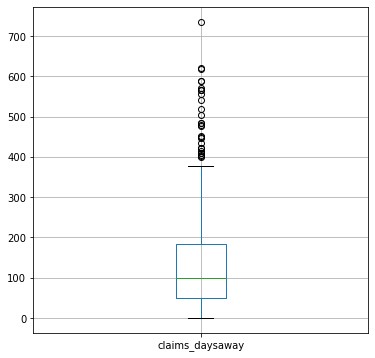

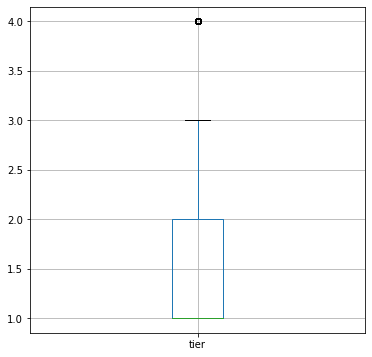

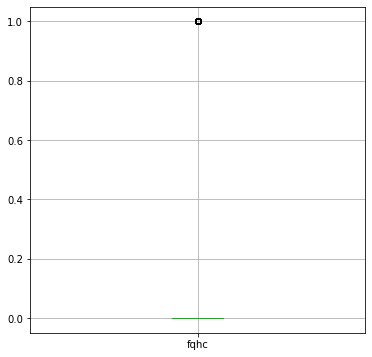

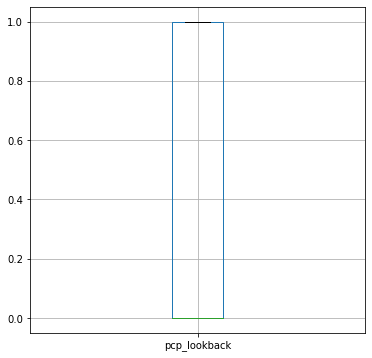

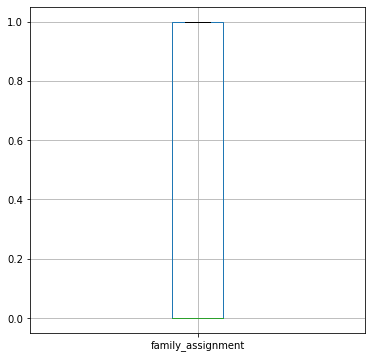

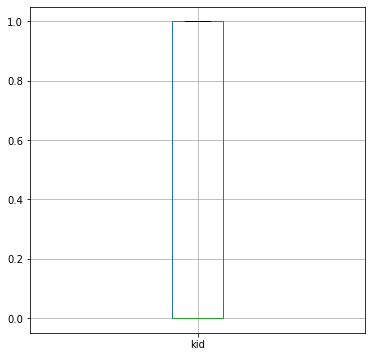

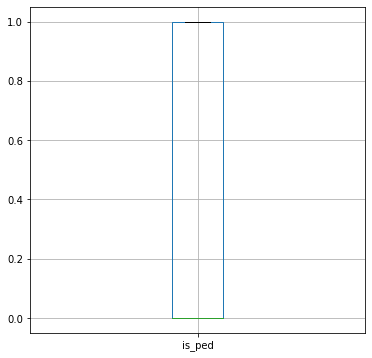

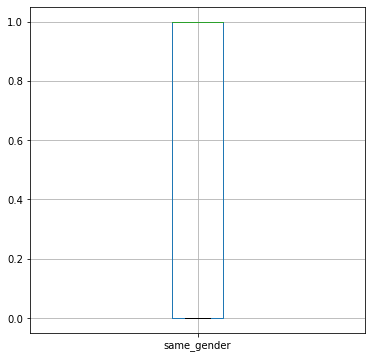

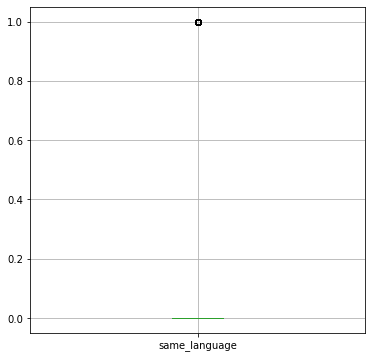

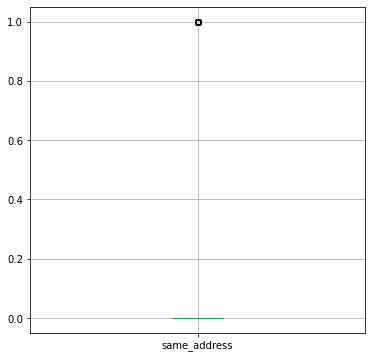

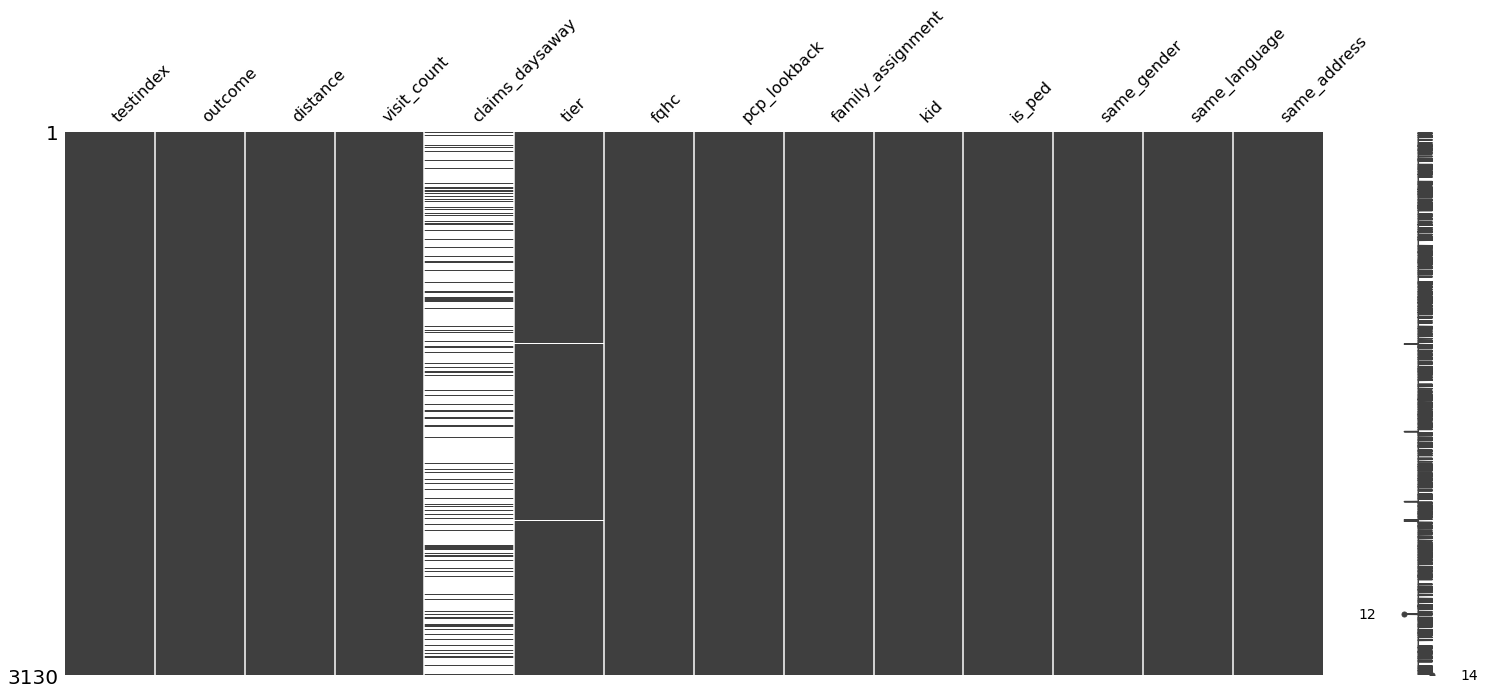

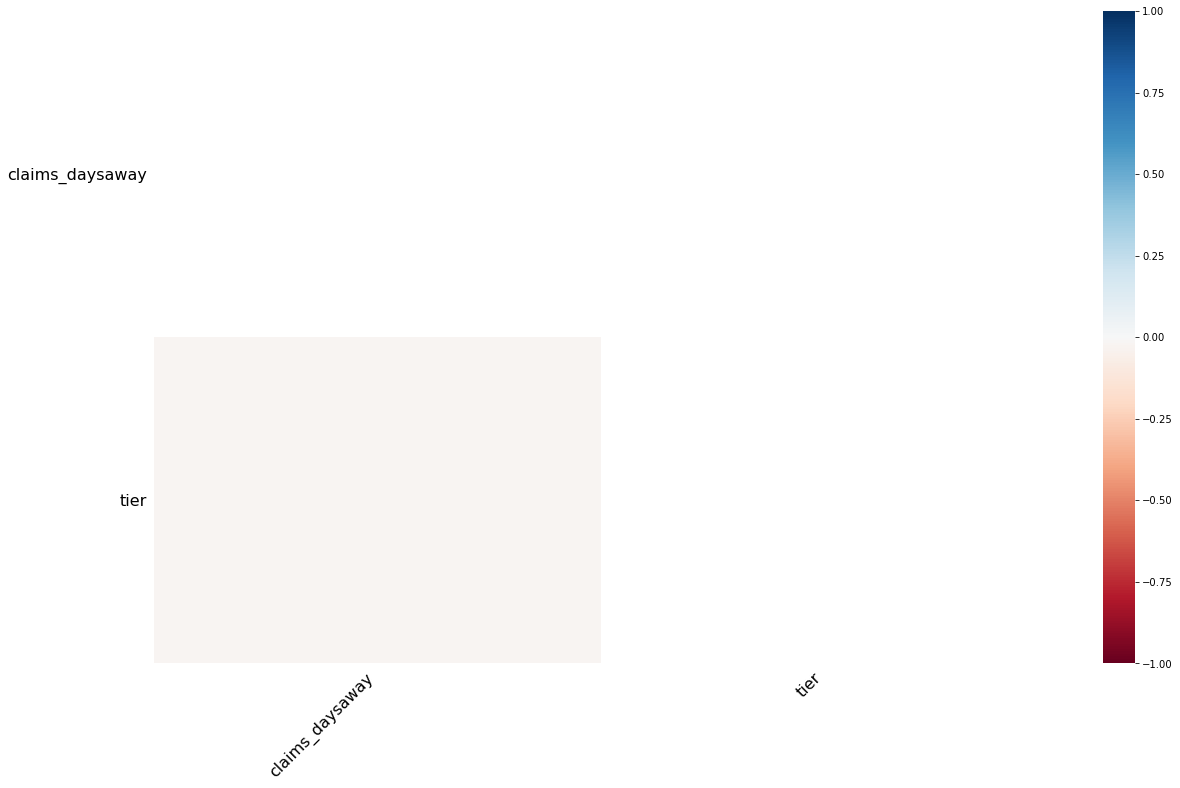

In [7]:
def visualize(dataset):
    
    #--------------------------------------------------------------------------------------------------------------#
    
    # Check correlation between features using heatmap
    # Each square shows the correlation between the variables on each axis.
    # A value near 0: There is no linear trend between the two variables.
    # A value near 1: If one variable increases so does the other and the closer to 1 the stronger the relationship. 
    # A value near -1: If one variable decreases then the other increases.
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(dataset.corr(), ax=ax, annot=True)
    plt.show()
    
    #--------------------------------------------------------------------------------------------------------------#
    
    # Plot histogram for numeric data 
    dataset.hist(figsize = (20,18)) 
    plt.show() 

    #--------------------------------------------------------------------------------------------------------------#

    # Plot boxplot to check for outliers
    columns = ['outcome', 'distance', 'visit_count', 'claims_daysaway', 'tier', 'fqhc',
       'pcp_lookback', 'family_assignment', 'kid', 'is_ped', 'same_gender','same_language', 'same_address']
    for column in columns:
        plt.figure(figsize = (6,6))
        dataset.boxplot([column])
        
    #--------------------------------------------------------------------------------------------------------------#

    # Visualize missing values as a matrix.
    # The white spaces denote the missing values. 
    msno.matrix(dataset)
    
    # Visualize the correlation between the number of missing values in different columns as a heatmap
    # A value near -1: if one variable appears then the other variable is very likely to be missing.
    # A value near 0: There is no dependence between the occurrence of missing values of two variables.
    # A value near 1: if one variable appears then the other variable is very likely to be present.
    msno.heatmap(dataset) 
    
    #--------------------------------------------------------------------------------------------------------------#
    
        
visualize(df)

# Outlier Removal

In [8]:
# Drop irrelevant columns - Columns that contributes to majority of missing values and has minimal role in usecase
df.drop(['claims_daysaway'], axis=1, inplace=True)
print(df.shape)

# Remove records with missing values based on columns of interest
df = df.dropna(subset=["tier"])
print(df.shape)

(3130, 13)
(3121, 13)


In [9]:
# # Remove outliers using IQR Method
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(df.shape)

# Feature Selection

In [10]:
# Use Recursive Feature Elimination to select best features
# Separate features and target variable
X = df.iloc[:,2:]
y = df.iloc[:,1]

estimator = DecisionTreeClassifier()
selector = RFE(estimator, step=1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True False  True False  True False False False False]
[1 1 1 6 1 5 1 2 3 7 4]


In [11]:
# Display the best features selected
columns = X.columns[selector.support_]
df[columns]

,distance,visit_count,tier,pcp_lookback,kid
0,0.071912,0,2.0,0,0
1,0.448447,0,1.0,0,1
2,0.345793,0,1.0,1,0
3,1.857032,0,1.0,0,1
4,7.222060,0,1.0,0,1
...,...,...,...,...,...
3125,1.447149,0,3.0,1,0
3126,4.764236,12,1.0,1,1
3127,2.796333,15,1.0,0,0
3128,0.641309,0,1.0,0,1


# Model Training

In [17]:
# Separate features and target variable
X = df[columns]
y = df[['outcome']]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the Decision Tree model for regression
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation

In [18]:
# Evaluate the model using regression metrics
# Low regression metrics indicated higher accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06830309498399147
Mean Squared Error: 0.06830309498399147
Root Mean Squared Error: 0.26134860815392047


# Model Testing

In [19]:
new_input = [[50, 0, 2, 0, 1]]
print("Model prediction: ", int(model.predict(new_input)[0]))

Model prediction:  1
